## Main sequence (MS) lifetimes

**Input**: Padova isochrones 

**Method**: Get ages of the turn-off points for different metallicties; fit age-mass relations

**Output**: Age-mass pairs and fit parameters for metallicity grid

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from helpers import MSAgeHandler

### 1. Extract MS lifetimes from our isochrone grid (function definitions)

Lifetime of the MS depends on stellar mass and metallicity.

**Approach**
- For each metallicity, go through all single-age isochrones and do: 

  - Find stars that already moved from the main sequence to the subgiant branch 
  (for Padova label(MS)=1, label(SGB)=2), i.e., with label=2

  - Among those stars (isochrone rows), take the least massive star - it will be the closest mass
  to the turn-off point for that age

  - Add this age-mass pair to the output lists

  - At the end, remove dublicated records if any

  - Save the retrieved age - MS-lifetime relation for this metallicity

### 2. Fit MS-lifetime - mass relation (function definitions)
For WD modelling, we will use a smooth analytic relation and not the raw data from the isochrones.

**Two fit models are tested:**

- 2-slope broken power law (with a free or fixed breakpoint mass)
- 3-slope BPL

**All functions are implemented as methods of MSAgeHandler class.**

### 3. Application of the functions from steps 1 and 2

In [2]:
msage_handler = MSAgeHandler()

In [3]:
# Read metallicity grid 
# old
#metgrid = np.loadtxt('../../jjmodel/jjmodel/input/isochrones/Metallicity_grid.txt').T[1]
# new
metgrid = np.loadtxt('../../isochrones/grids/metgrid_linFeH.txt').T[1]

FeH_grid = np.sort(metgrid)
FeH_grid = np.round(FeH_grid,2)

# Print the grid to see what metallicities are available
FeH_grid

array([-2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.  ,
       -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.45, -1.4 , -1.35, -1.3 ,
       -1.25, -1.2 , -1.15, -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85,
       -0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.13,  0.16,
        0.19,  0.22,  0.25,  0.28,  0.31,  0.34,  0.37,  0.4 ,  0.43,
        0.46,  0.49])

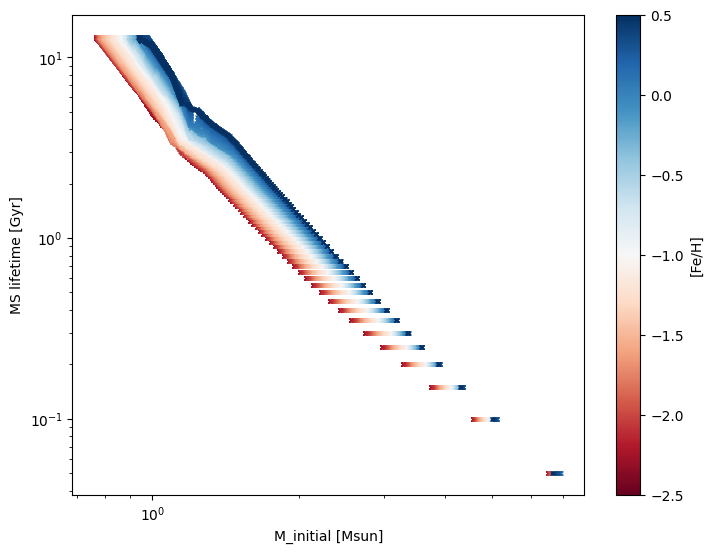

In [4]:

# Define isochrone directory
#iso_dir = '../../jjmodel/jjmodel/input/isochrones/Padova/multiband' # old met grid
iso_dir = '../../isochrones/1_parsec/parsec_update_formatted_v2/GDR3' # new met grid


# Create output directories
dir_base = 'MS_lifetime_padova_new_metgrid'

dir_ms = os.path.join(dir_base,'data') # here the retrieved data will be saved
dir_analysis = os.path.join(dir_base,'analysis') # here the fit tests will be saved

os.makedirs(dir_ms, exist_ok=True)
os.makedirs(dir_analysis, exist_ok=True)

# Retrieve and save the data
msage_handler.retrieve_ms_lifetimes(FeH_grid, iso_dir=iso_dir, dir_out=dir_ms)

# Plot the obtained MS-lifetime data (sigle overview plot for all metallicities)
msage_handler.plot_age_ms(FeH_grid, dir_data=dir_ms, dir_out=dir_analysis);

Chi^2 =  0.00033
M_br1 =  1.2 Msun
alpha1 =  -4.36
alpha2 =  -2.66


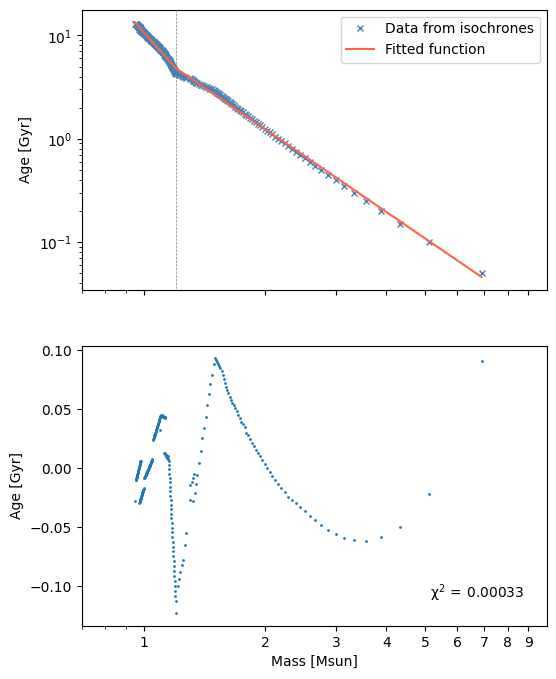

In [5]:
# Test fitting for a single metalicity
# Note: Mbr is only needed for func='v1' when it's a constant, otherwise it's ignored

msage_handler.fit_ms_lifetime(0.13,func='v1',Mbr=1.2,
                dir_data=dir_ms,dir_out=dir_analysis,plot=True,stat=True);

FeH       M_br1     b         alpha1    alpha2    
-2.8      1.18      0.7       -3.61     -2.55     
-2.7      1.18      0.7       -3.61     -2.55     
-2.6      1.18      0.7       -3.61     -2.55     
-2.5      1.18      0.7       -3.61     -2.55     
-2.4      1.18      0.7       -3.61     -2.55     
-2.3      1.18      0.7       -3.61     -2.55     
-2.2      1.18      0.7       -3.61     -2.55     
-2.1      1.18      0.7       -3.6      -2.55     
-2.0      1.18      0.71      -3.57     -2.56     
-1.9      1.18      0.71      -3.56     -2.55     
-1.8      1.18      0.71      -3.58     -2.54     
-1.7      1.18      0.71      -3.59     -2.53     
-1.6      1.18      0.71      -3.62     -2.52     
-1.5      1.18      0.72      -3.63     -2.51     
-1.45     1.18      0.72      -3.63     -2.5      
-1.4      1.18      0.72      -3.63     -2.5      
-1.35     1.18      0.72      -3.63     -2.5      
-1.3      1.18      0.72      -3.64     -2.5      
-1.25     1.18      0.73      -

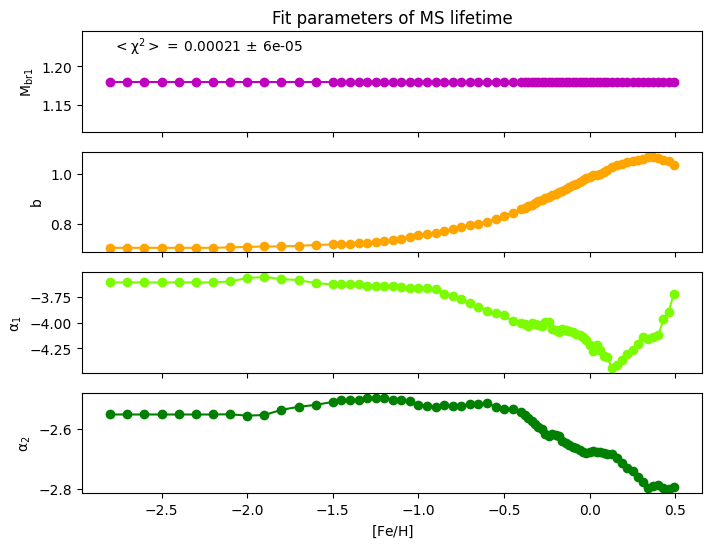

In [9]:
# Apply the fitting procedure to all metallicities

func = 'v1' # test v1 (2-slope + fixed Mbr), v2 (2-slope), v3 (3-slope)
Mbr = 1.18

dir_ms_fit = os.path.join(dir_analysis,'fit' + '_' + func)
if func == 'v1':
    dir_ms_fit += '_Mbr' + str(Mbr)
os.makedirs(dir_ms_fit, exist_ok=True)

# 1. Save the fit parameters and plot them as a function of metallicity
msage_handler.fit_all_metallicities(FeH_grid, func=func, Mbr=Mbr, 
                      dir_data=dir_ms, dir_out=dir_ms_fit, plot=True)

# 2. Also save individual fit plots for a detailed view
dir_ms_fit_plots = os.path.join(dir_ms_fit,'plots')
os.makedirs(dir_ms_fit_plots, exist_ok=True)

for met in FeH_grid:
    msage_handler.fit_ms_lifetime(met, func=func, Mbr=Mbr,
                    dir_data=dir_ms, dir_out=dir_ms_fit_plots, plot=True, stat=True, verbose=False);
    plt.close()


### Conclusion

A two-slope BPL is good enough to describe the shape of the relation. 
The third slope improves chi2 only a little - from 0.00022 to 0.00015. But the position of the second breakpoint often hits the allowed fit bounds implying that this break is not physical. 

For a two-slope fit, the breakpoint position varies in the range of 1.15 - 1.25 solar masses and can be fixed to 1.2 Msun without significant loss of quality (chi2 changes from 0.00022 to 0.00024). 